<a href="https://colab.research.google.com/github/Al3jandraMtz/Proyecto4_DataLab/blob/main/P4_Significancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba de significancia

In [ ]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('/content/Data-Set-Sentimiento1.csv')

In [ ]:
import pandas as pd
import scipy.stats as stats

# Paso 1: Crear la columna `high_rating`
high_rating_threshold = 4
df['high_rating'] = df['adjusted_rating'] >= high_rating_threshold

# Paso 2: Crear una tabla de contingencia entre la categoría de producto y la calificación alta
contingency_table = pd.crosstab(df['category_1'], df['high_rating'])

# Paso 3: Realizar la prueba chi-cuadrado
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Mostrar los resultados
print("Tabla de Contingencia:")
print(contingency_table)
print("\nResultados de la Prueba Chi-cuadrado:")
print(f"Chi-cuadrado: {chi2:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Grados de libertad: {dof}")
print("\nFrecuencias Esperadas:")
print(expected)


Tabla de Contingencia:
high_rating            False  True 
category_1                         
Car&Motorbike              1      0
Computers&Accessories     66    309
Electronics              128    362
Health&PersonalCare        0      1
Home&Kitchen             145    303
HomeImprovement            0      2
MusicalInstruments         1      1
OfficeProducts             0     31
Toys&Games                 0      1

Resultados de la Prueba Chi-cuadrado:
Chi-cuadrado: 39.29
p-value: 0.0000
Grados de libertad: 8

Frecuencias Esperadas:
[[2.52405625e-01 7.47594375e-01]
 [9.46521095e+01 2.80347890e+02]
 [1.23678756e+02 3.66321244e+02]
 [2.52405625e-01 7.47594375e-01]
 [1.13077720e+02 3.34922280e+02]
 [5.04811251e-01 1.49518875e+00]
 [5.04811251e-01 1.49518875e+00]
 [7.82457439e+00 2.31754256e+01]
 [2.52405625e-01 7.47594375e-01]]


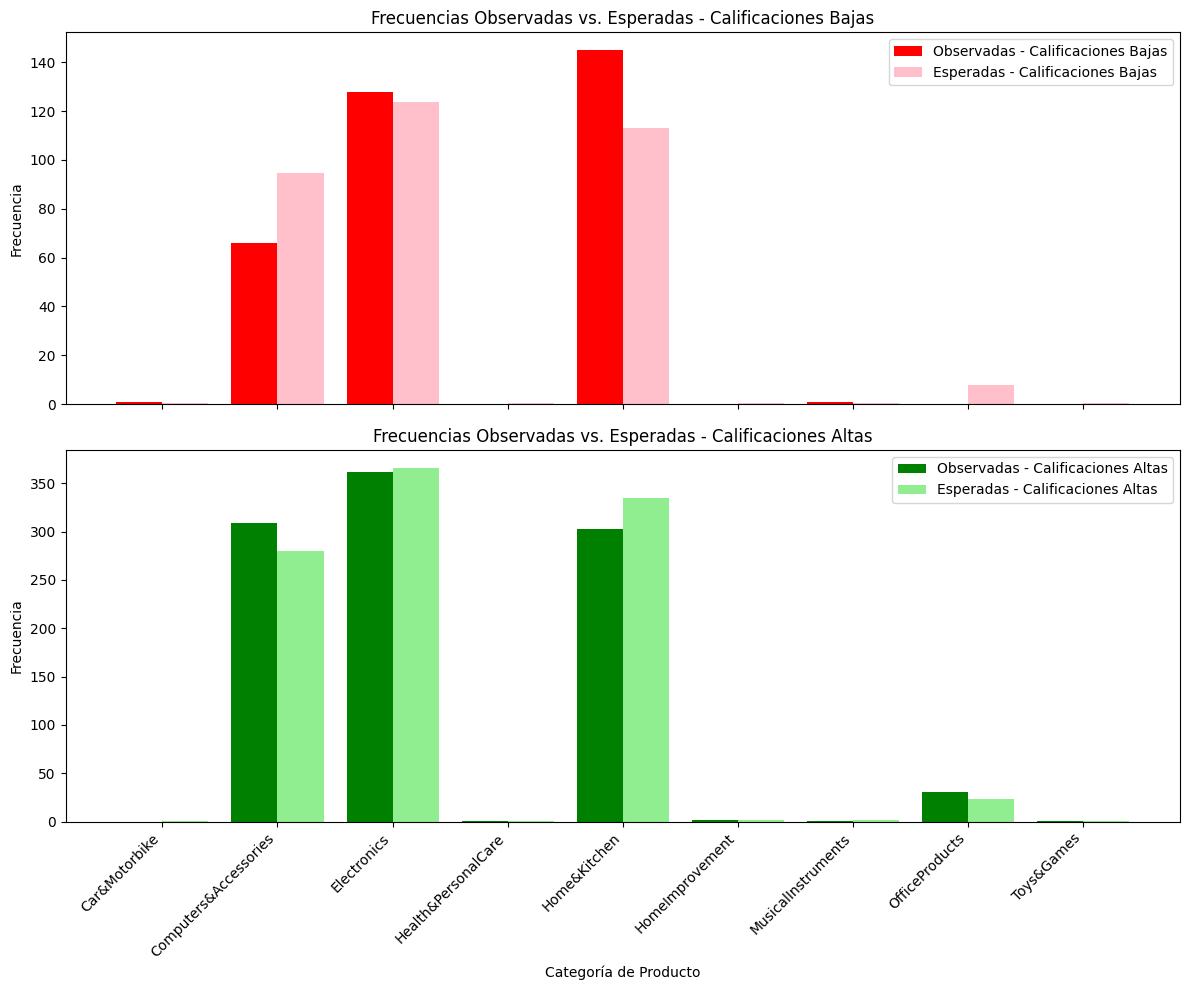

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Frecuencias observadas y esperadas (estos datos los tienes ya de la prueba chi-cuadrado)
observed = contingency_table.values
expected = expected  # Lo obtuviste de la prueba chi-cuadrado

# Crear un gráfico de barras para las frecuencias observadas vs. esperadas
categories = contingency_table.index
n_categories = len(categories)

# Configurar el gráfico
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Gráfico para Calificaciones Bajas (False)
ax[0].bar(np.arange(n_categories) - 0.2, observed[:, 0], width=0.4, label='Observadas - Calificaciones Bajas', color='red')
ax[0].bar(np.arange(n_categories) + 0.2, expected[:, 0], width=0.4, label='Esperadas - Calificaciones Bajas', color='pink')
ax[0].set_title('Frecuencias Observadas vs. Esperadas - Calificaciones Bajas')
ax[0].set_ylabel('Frecuencia')
ax[0].legend()

# Gráfico para Calificaciones Altas (True)
ax[1].bar(np.arange(n_categories) - 0.2, observed[:, 1], width=0.4, label='Observadas - Calificaciones Altas', color='green')
ax[1].bar(np.arange(n_categories) + 0.2, expected[:, 1], width=0.4, label='Esperadas - Calificaciones Altas', color='lightgreen')
ax[1].set_title('Frecuencias Observadas vs. Esperadas - Calificaciones Altas')
ax[1].set_xlabel('Categoría de Producto')
ax[1].set_ylabel('Frecuencia')
ax[1].set_xticks(np.arange(n_categories))
ax[1].set_xticklabels(categories, rotation=45, ha='right')
ax[1].legend()

plt.tight_layout()
plt.show()
